## Упражнение 1

Постройте столбчатую диаграмму для результатов тестов студентов по данным файла `StudentsPerformance.csv`. Столбцы постройте для каждого теста (чтение, письмо, математика) отдельно для тех, кто проходил подготовку, и тех, кто не проходил. Высота столбца - среднее значение, погрешность - стандартное отклонение. Цвета должны быть осмысленными (например, одним цветом - подготовленные, другим - нет, или один тест - один цвет)

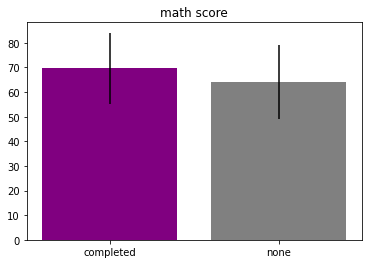

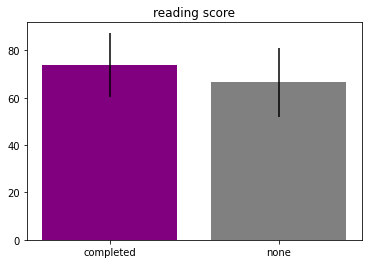

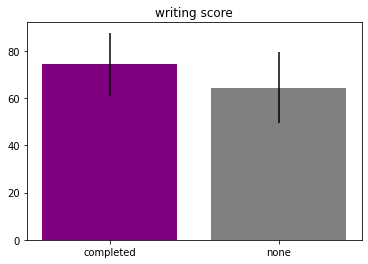

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

students = pd.read_csv("StudentsPerformance.csv")
done = students[students["test preparation course"] == "completed"]
none = students[students["test preparation course"] == "none"]

for type in ("math score", "reading score", "writing score"):
    x = ['completed', 'none']
    height = []
    y = []
    colors = ['purple', 'gray']
    
    for df in (done, none):
        h = np.mean(df[type])
        err = np.std(df[type])
        height.append(h)
        y.append(err)
        
    plt.bar(x, height = height, yerr = y, color = colors)
    plt.title(type)
    plt.show()

## Упражнение 2

Постройте результаты всех трёх экзаменов на одном графике. Какой экзамен показать цветом, можно выбрать самостоятельно. Можно построить все варианты и выбрать наиболее говорящий.

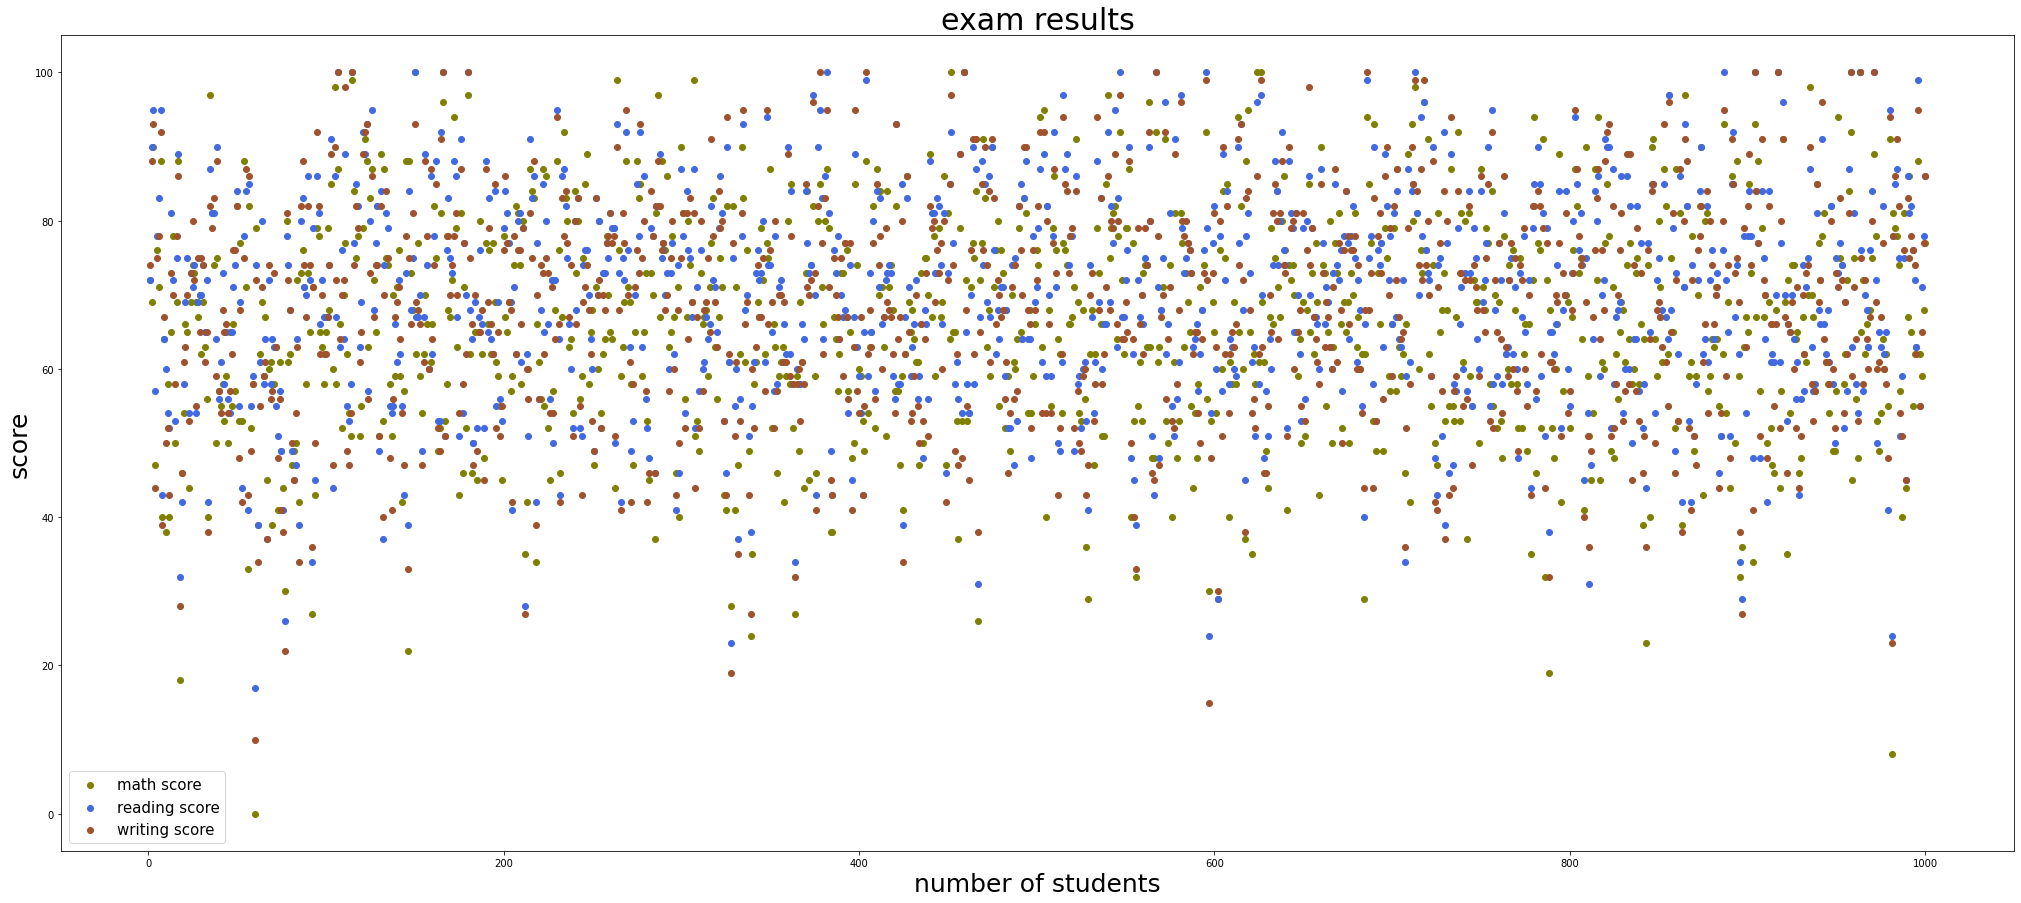

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

students = pd.read_csv("StudentsPerformance.csv")
colors = ['olive', 'royalblue', 'sienna']
lines = students.shape[0]
x = []
type = ("math score", "reading score", "writing score")
plt.figure(figsize = (35,15))

for i in range(lines):
    x.append(i+1)
    
for i in range (len(type)):    
    plt.scatter(x, students[type[i]], color = colors[i])
    plt.title('exam results', fontsize = 30)
    plt.legend(type, fontsize = 15)
    plt.xlabel('number of students', fontsize = 25)
    plt.ylabel('score', fontsize = 25)
plt.show() 

## Упражнение 3

Постройте график для данных из файла `Chromo.txt` от 4 до 7 минут, покажите стрелкой максимум.

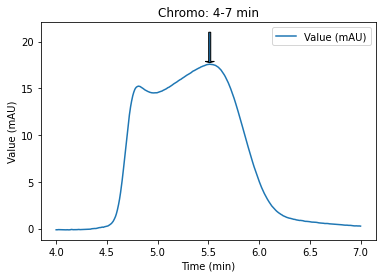

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Chromo.txt', sep = '\t')
df1 = df[(df['Time (min)']>=4) & (df['Time (min)']<=7)]
df1.plot('Time (min)','Value (mAU)', ylabel = 'Value (mAU)', title = 'Chromo: 4-7 min')

maximum = max(df1[df1.columns[1]])
max_ind = df1[df1[df1.columns[1]] == maximum].index.values.astype(int) 
x_max = df1[df1.columns[0]][int(max_ind)]
plt.arrow(x = x_max, y = 21, dx = 0, dy = (maximum-21+0.3), width = 0.02,  head_width = 0.09)

## Упражнение 4

Добавьте вертикальные и горизонтальные линии на значениях `50, 66, 85` на графике из упражнения 2.

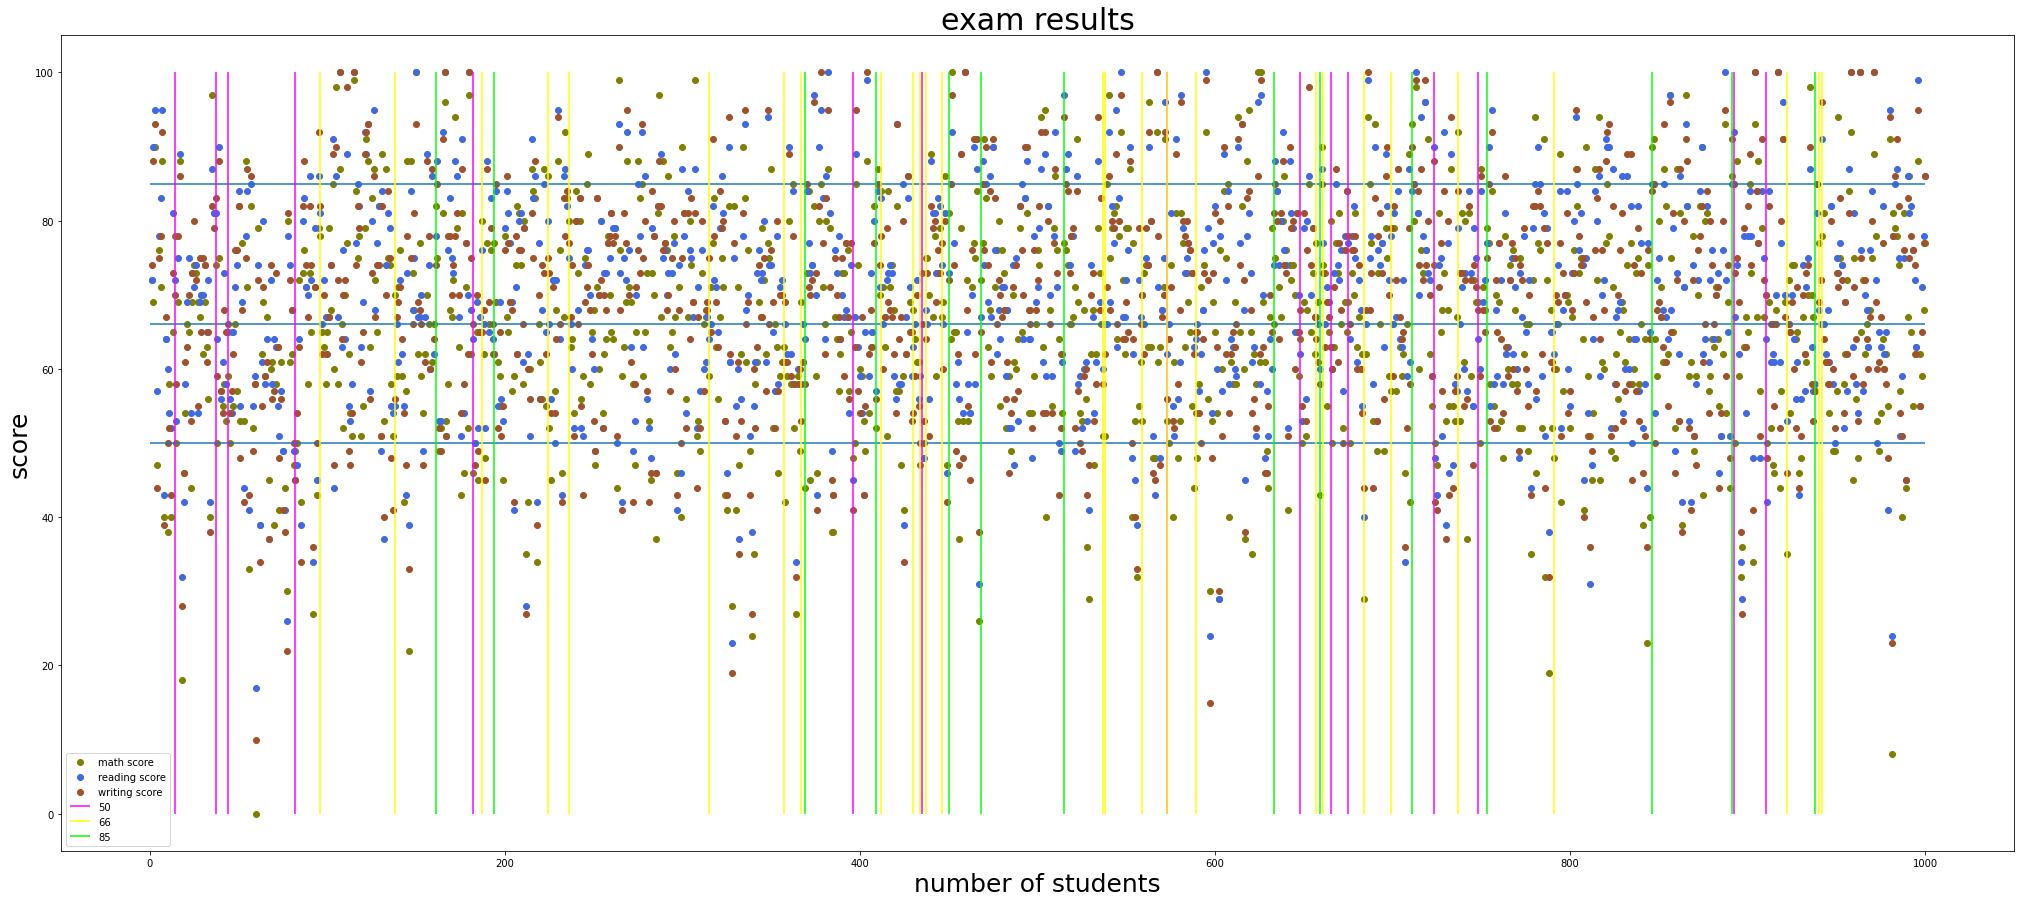

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

students = pd.read_csv("StudentsPerformance.csv")
colors = ['olive', 'royalblue', 'sienna']
lines = students.shape[0]
x = []
for i in range(lines):
    x.append(i+1)   
value = []
numbers = [50, 66, 85]
i = 0
while i < 3:
    value.append(students[students[students.columns[i+5]] == numbers[i]].index.values)
    i+=1
type = ("math score", "reading score", "writing score")
plt.figure(figsize = (35,15))
lc = ['magenta', 'yellow', 'lime']

for i in range (len(type)):  
    plt.scatter(x, students[type[i]], color = colors[i], label = type[i])
    plt.title('exam results', fontsize = 30)
    plt.xlabel('number of students', fontsize = 25)
    plt.ylabel('score', fontsize = 25)
    plt.hlines(numbers[i], 0, 1000)
    plt.legend(type)
for i in range (len(numbers)):
    plt.vlines(value[i], 0, 100, colors = lc[i], label = numbers[i])
    plt.legend()

plt.show()